# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Daffa Haidar Farras
- **Email:** daffahaidarfarras@gmail.com
- **ID Dicoding:** daffa_haidar

## Menentukan Pertanyaan Bisnis

- Perusahaan ingin melihat bagaimana pertumbuhan transaksi rental sepeda dan pengguna baru disetiap harinya dari tahun 2011 sampai 2012.
- Perusahaan ingin mengetahui bagaimana performa rental sepeda disetiap musimnya dan juga ingin mengetahui bagaimana performa rental sepeda disetiap jam nya.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [ ]:
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

**Insight:**
- Data dalam bentuk CSV
- Oleh karena itu untuk membaca file CSV menggunakan pd.read_csv
- Saya menggunakan 2 dataset
- Masing-masing dataset tidak digabung
- Di dataset ini berisi beberapa informasi :
  - Variabel waktu : Tanggal, bulan, tahun, dan jam
  - Jumlah customer
  - Faktor Eksternal

### Assessing Data

In [ ]:
# Mencari Jumlah Null di dataset day

day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Mencari Jumlah Null di dataset hour

hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Mencari Jumlah duplicate data di dataset day

day.duplicated().sum()

0

In [ ]:
# Mencari Jumlah duplicate data di dataset hour

hour.duplicated().sum()

0

In [ ]:
# menghitung nilai IQR menggunakan 'cnt' pada kedua dataset

# menghitung nilai IQR pada dataset day.csv
q25_day, q75_day = day['cnt'].quantile(0.25), day['cnt'].quantile(0.75)
iqr_day = q75_day - q25_day
cut_off_day = iqr_day * 1.5
minimum_day, maximum_day = q25_day - cut_off_day, q75_day + cut_off_day

# Identifikasi outlier pada dataset day.csv
outliers_day = day[(day['cnt'] < minimum_day) | (day['cnt'] > maximum_day)]

# menghitung nilai IQR pada dataset hour.csv
q25_hour, q75_hour = hour['cnt'].quantile(0.25), hour['cnt'].quantile(0.75)
iqr_hour = q75_hour - q25_hour
cut_off_hour = iqr_hour * 1.5
minimum_hour, maximum_hour = q25_hour - cut_off_hour, q75_hour + cut_off_hour

# Identifikasi outlier pada dataset hour.csv
outliers_hour = hour[(hour['cnt'] < minimum_hour) | (hour['cnt'] > maximum_hour)]

#menampilkan hasil outlier pada ke dua dataset
len(outliers_day), len(outliers_hour)

(0, 505)

**Insight:**
- Pada tahap ini kedua dataset tidap memiliki nilai NULL ataupun nilai yang terduplicate
- Tetapi pada dataset hour memiliki outlier sebanyak 505

### Cleaning Data

In [ ]:
# Menghitung Q1 dan Q3
q25 = hour['cnt'].quantile(0.25)
q75 = hour['cnt'].quantile(0.75)
iqr = q75 - q25

# Menentukan batas bawah dan batas atas
cut_off = iqr * 1.5
lower_bound = q25 - cut_off
upper_bound = q75 + cut_off

# Identifikasi outlier
outliers = hour[(hour['cnt'] < lower_bound) | (hour['cnt'] > upper_bound)]

# Menampilkan outlier
print(outliers)


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     149   
10358          

In [ ]:
# Hitung Q1 (quartile 25%) dan Q3 (quartile 75%)
Q1 = hour['cnt'].quantile(0.25)
Q3 = hour['cnt'].quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR

# Identifikasi kondisi outlier
kondisi_lower_than = hour['cnt'] < minimum
kondisi_more_than = hour['cnt'] > maximum

# Ganti nilai yang lebih besar dari batas atas dengan maximum
hour.loc[kondisi_more_than, 'cnt'] = maximum

# Ganti nilai yang lebih kecil dari batas bawah dengan minimum
hour.loc[kondisi_lower_than, 'cnt'] = minimum

# Cek hasilnya
hour_outliers_replaced = hour[kondisi_lower_than | kondisi_more_than]
print(hour_outliers_replaced)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     149   
10358          

<ipython-input-25-ed31d656b104>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '642.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour.loc[kondisi_more_than, 'cnt'] = maximum


In [ ]:
# Menghitung Q1 dan Q3
q25 = hour['cnt'].quantile(0.25)
q75 = hour['cnt'].quantile(0.75)
iqr = q75 - q25

# Menentukan batas bawah dan batas atas
cut_off = iqr * 1.5
lower_bound = q25 - cut_off
upper_bound = q75 + cut_off

# Identifikasi outlier
outliers = hour[(hour['cnt'] < lower_bound) | (hour['cnt'] > upper_bound)]

# Menampilkan outlier
print(outliers)


Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- Karena pada kedua dataset tidak memiliki nilai NULL dan nilai yang terduplicate
- Maka, saya berfokus untuk menghilangkan outlier yang terdapat pada dataset hour.csv

## Exploratory Data Analysis (EDA)

### Explore day.csv

In [ ]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Axes(0.125,0.11;0.775x0.77)


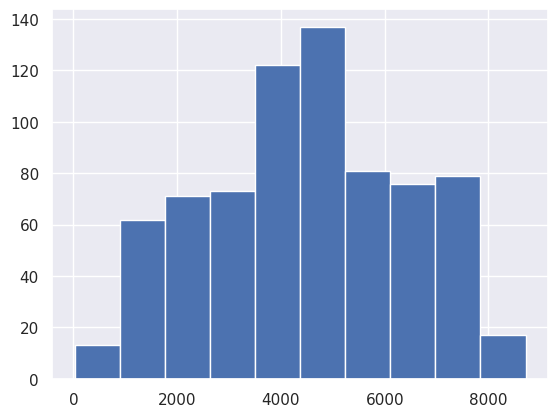

In [ ]:
print(day.cnt.hist())

### Explore hour.csv

In [ ]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000000017
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730
mean,8690.0000,1970-01-01 00:00:00.000000011,2.501640,0.502561,6.537775,1970-01-01 00:00:00.000000011,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,186.361327,NaN
min,1.0000,1970-01-01 00:00:00,1.000000,0.000000,1.000000,1970-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,1970-01-01 00:00:00.000000006,2.000000,0.000000,4.000000,1970-01-01 00:00:00.000000006,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,1970-01-01 00:00:00.000000012,3.000000,1.000000,7.000000,1970-01-01 00:00:00.000000012,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,1970-01-01 00:00:00.000000018,3.000000,1.000000,10.000000,1970-01-01 00:00:00.000000018,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,1970-01-01 00:00:00.000000023,4.000000,1.000000,12.000000,1970-01-01 00:00:00.000000023,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,642.500000,NaN


Axes(0.125,0.11;0.775x0.77)


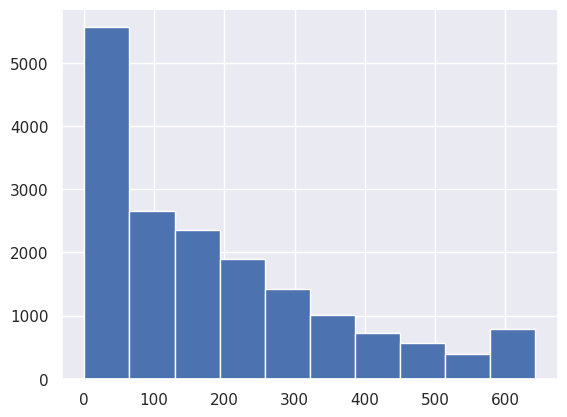

In [ ]:
print(hour.cnt.hist())

**Insight:**
- Untuk mengetahui detail-detail nilai yang berada pada kedua dataset, saya menggunakan *descibe()* untuk melihat detailnya
- dan juga menggunakan *hist()* untuk melihat plot histogram per kolom numerik

## Visualization & Explanatory Analysis

### Pertanyaan 1:

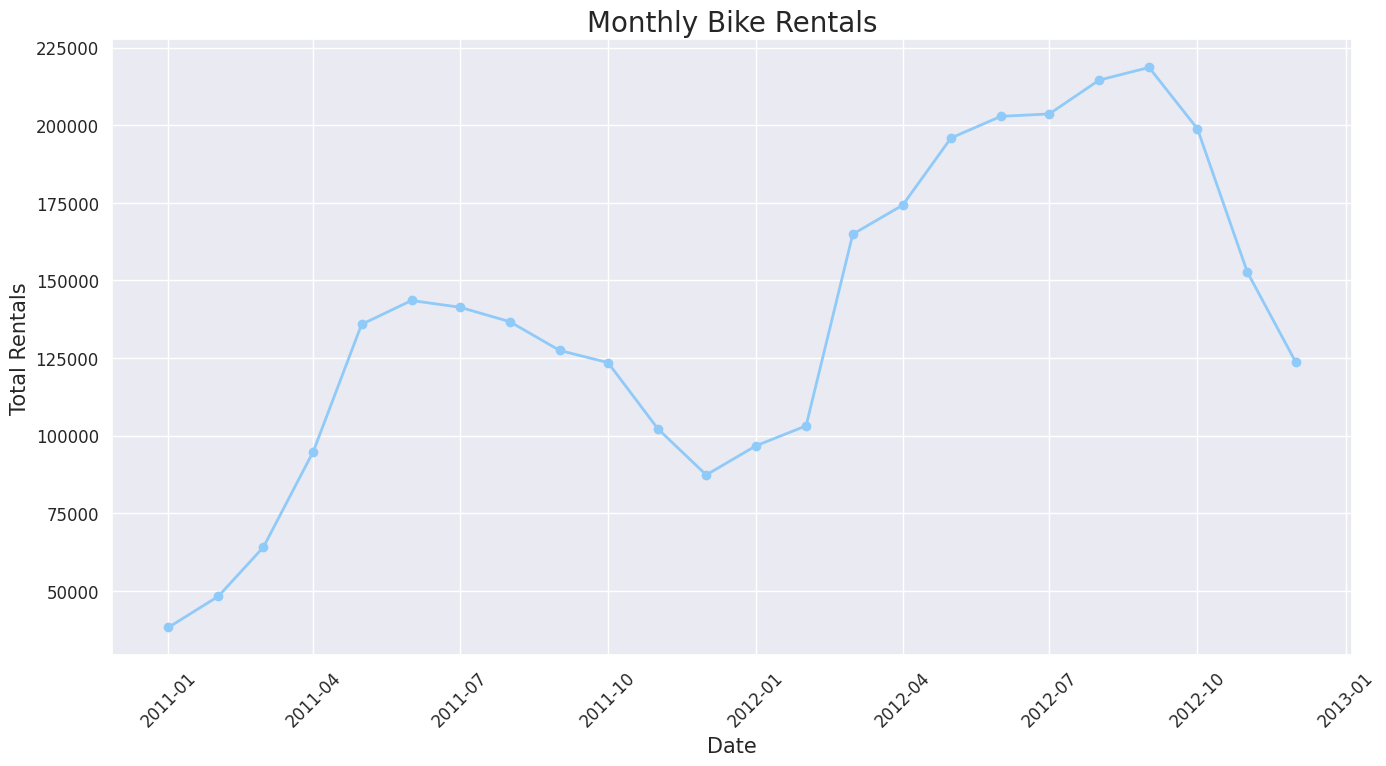

In [ ]:
day['dteday'] = pd.to_datetime(day['dteday'])

# Ekstrak bulan dan tahun
day['month_year'] = day['dteday'].dt.to_period('M')

# Hitung total penyewaan sepeda per bulan
monthly_rentals = day.groupby('month_year')['cnt'].sum().reset_index()

# Konversi kembali bulan dan tahun ke datetime untuk plotting
monthly_rentals['month_year'] = monthly_rentals['month_year'].dt.to_timestamp()

# Plot total penyewaan sepeda per bulan
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    monthly_rentals['month_year'],
    monthly_rentals['cnt'],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
ax.set_title('Monthly Bike Rentals', fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Total Rentals', fontsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


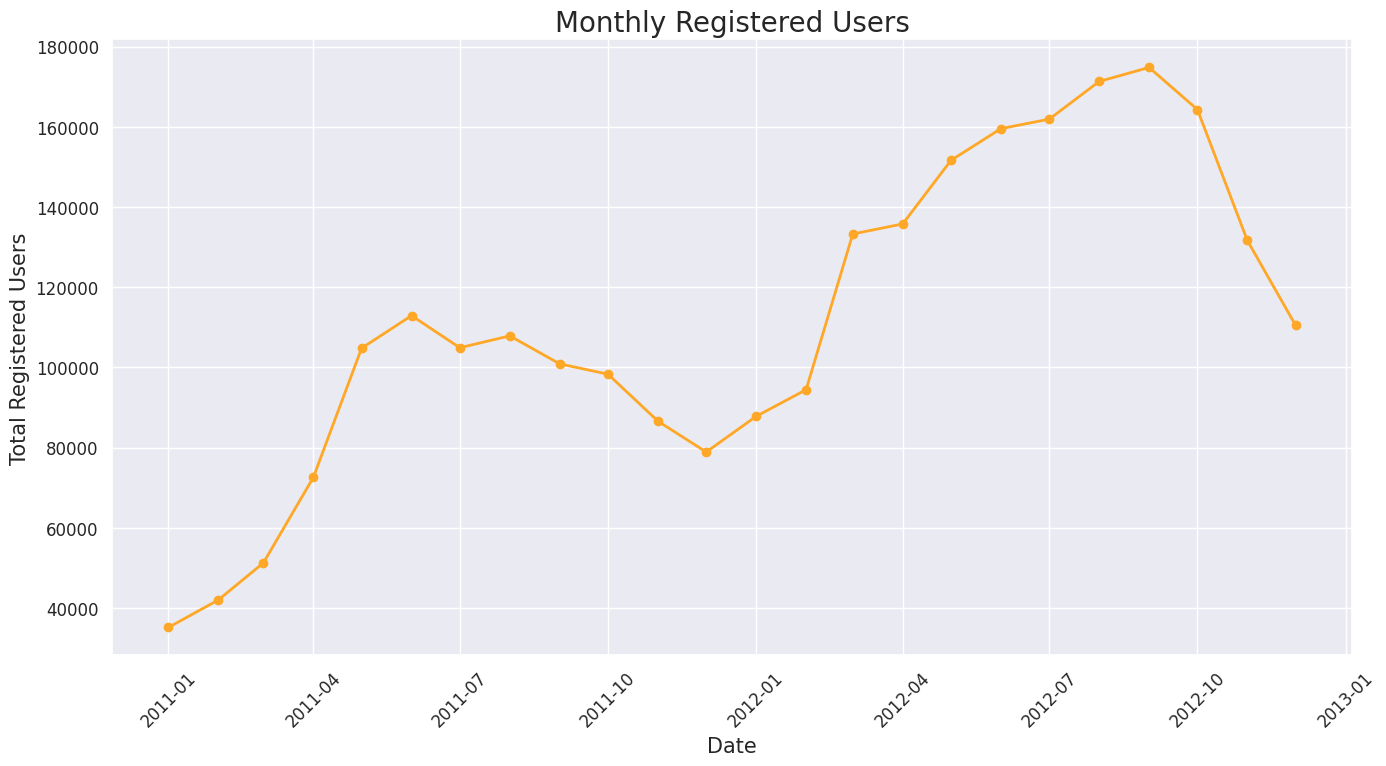

In [ ]:
day['dteday'] = pd.to_datetime(day['dteday'])

# Ekstrak bulan dan tahun
day['month_year'] = day['dteday'].dt.to_period('M')

# Hitung total pengguna terdaftar per bulan
monthly_registered = day.groupby('month_year')['registered'].sum().reset_index()

# Konversi kembali bulan dan tahun ke datetime untuk plotting
monthly_registered['month_year'] = monthly_registered['month_year'].dt.to_timestamp()

# Plot total pengguna terdaftar per bulan
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    monthly_registered['month_year'],
    monthly_registered['registered'],
    marker='o',
    linewidth=2,
    color="#FFA726"
)
ax.set_title('Monthly Registered Users', fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Total Registered Users', fontsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pertanyaan 2:

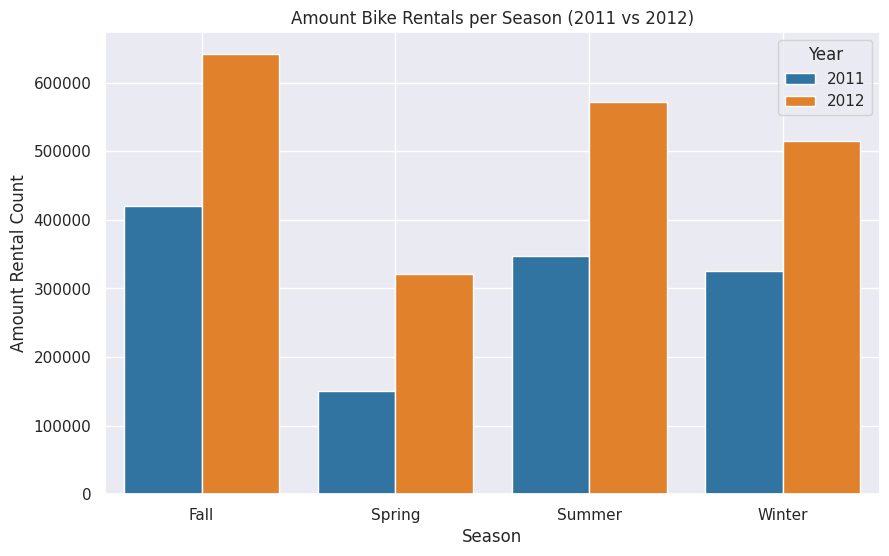

In [ ]:
# Map angka season ke nama musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day['season_label'] = day['season'].map(season_map)

# Konversi kolom 'dteday' ke tipe datetime
day['dteday'] = pd.to_datetime(day['dteday'])

# Hitung jumlah penyewaan sepeda per musim untuk setiap tahun
season_trend = day.groupby(['season_label', 'yr']).agg({'cnt': 'sum'}).reset_index()

season_trend['yr'] = season_trend['yr'].replace({0: 2011, 1: 2012})

# Plot tren musiman
plt.figure(figsize=(10, 6))
custom_palette = ['#1f77b4', '#ff7f0e']
sns.barplot(x='season_label', y='cnt', hue='yr', data=season_trend, palette=custom_palette)
plt.title('Amount Bike Rentals per Season (2011 vs 2012)')
plt.ylabel('Amount Rental Count')
plt.xlabel('Season')
plt.legend(title='Year')
plt.grid(True)


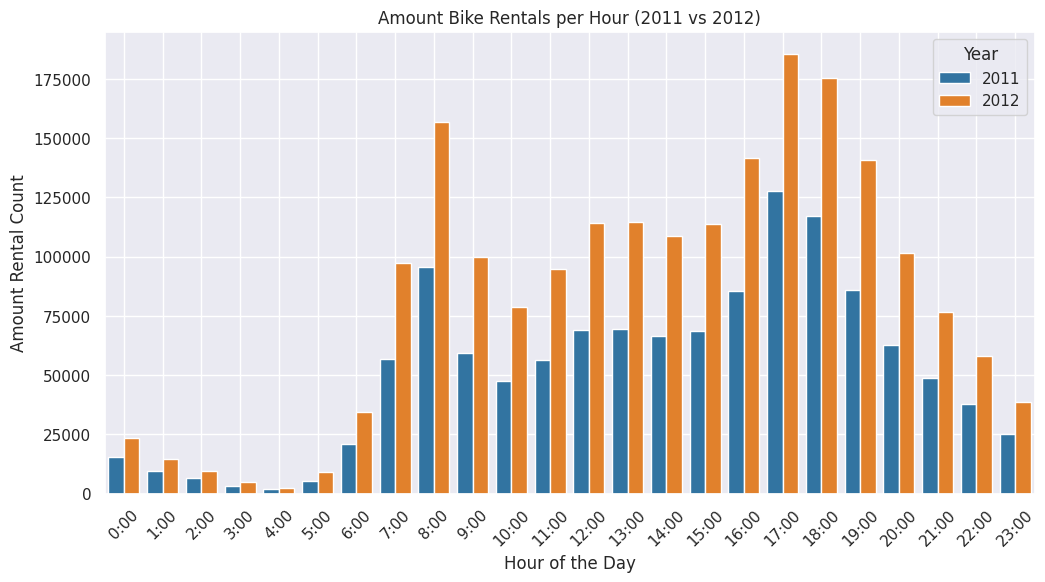

In [ ]:
# Hitung jumlah penyewaan sepeda per jam untuk setiap tahun
hour_trend = hour.groupby(['hr', 'yr']).agg({'cnt': 'sum'}).reset_index()

# Mengganti nilai tahun dengan 2011 dan 2012
hour_trend['yr'] = hour_trend['yr'].replace({0: 2011, 1: 2012})

# Plot tren penyewaan sepeda per jam
plt.figure(figsize=(12, 6))
custom_palette = ['#1f77b4', '#ff7f0e']
sns.barplot(x='hr', y='cnt', hue='yr', data=hour_trend, palette=custom_palette)
plt.title('Amount Bike Rentals per Hour (2011 vs 2012)')
plt.ylabel('Amount Rental Count')
plt.xlabel('Hour of the Day')

# sumbu X agar hanya menampilkan jam
plt.xticks(ticks=range(0, 24), labels=[f"{i}:00" for i in range(24)], rotation=45)  # Format jam
plt.xlim(-0.5, 23.5)  # Mengatur batas sumbu x untuk menampung semua jam
plt.legend(title='Year')
plt.grid(True)
plt.show()


**Insight:**
- Perusahaan ingin melihat pertumbuhan transaksi dan pengguna baru
- Untuk pertanyaan 1 :
  - menampilkan Line plot untuk melihat pertumbuhan transaksi rental sepeda dan pengguna baru
  - Line plot transaksi rental sepeda di visualisasikan berdasarkan kolom hari (dteday) yang digabungkan menjadi per-bulan dan kolom jumlah transaksi (cnt)
  - Line plot pertumbuhan pengguna baru di visualisasikan berdasarkan kolom hari (dteday)  yang digabungkan menjadi per-bulandan kolom jumlah registrasi (registered)
- untuk pertanyaan 2 :
  - Menampilkan bar plot untuk melihat perbandingan transaksi di setiap musim dan setiap jam
  - pada bar plot musim, setiap transaksi dikelompok terlebih dahulu berdasarkan musim dan tahun dilakukannya transaksi, lalu  dijumlahkan dan ditampilkan.
  - pada bar plot jam, setiap transaksi dikelompokan berdasarkan jam dan tahun di lakukannya transaksi, lalu dijumlahkan dan ditampilkan

## Conclusion

- Conclution pertanyaan 1 :
  Dari 2011 ke 2012 terlihat adanya pertumbuhan transaksi dan pengguna baru disetiap harinya, dan jika, dilihat dari grafik yang ditampilkan terdapat korelasi antara jumlah transaksi rental sepeda dengan jumlah pengguna baru. Sehingga, untuk bisa meningkatkan jumlah transaksi rental sepeda perlu diadakannya sebuah promosi untuk menarik pengguna baru.
- Conclution pertanyaan 2 :
  Jika dilihat dari tahun 2011 dan 2012 terdapat peningkatan jumlah transaksi disetiap musim maupun dalam kategori per-jam. Namun, jumlah transaksi dimusim gugur terlihat lebih sedikit dibandingkan musim lain. Sehingga, diperlukan sebuah *event* atau promosi khusus dimusim gugur untuk bisa manaikan jumlah transaksi dimusim tersebut.